## Student name: Vangari Prashanth
## Assignment: Regression

### Part 1: Data Wrangling (50 pts)
You have to write code to answer the questions below
7 pts each subtask except for the first one (importing pandas...) which is worth 1 pt

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""
Import pandas library
Read the data stored in your local machine https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
Save data to a variable named df
"""
df = pd.read_csv('healthcare-dataset-stroke-data.csv')  # Read the CSV file
df.head(5)    # print the first five rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


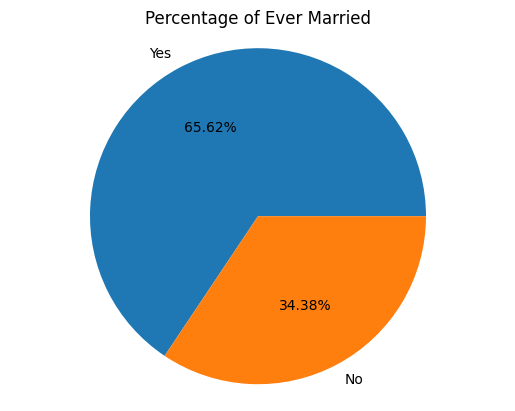

In [62]:
'''
Use a pie chart to show the percentage of ever_married with labels and percentage rounded up to 2 decimals.
'''

count = df['ever_married'].value_counts()
l = len(df)
pcnt = (count / l) * 100
pcnt = pcnt.round(2)

label = ['Yes', 'No']

plt.pie(pcnt, labels=label, autopct='%1.2f%%')
plt.title('Percentage of Ever Married')
plt.axis('equal')
plt.show()

In [63]:
'''
Encode the categorical columns to numeric. There are two types of encoding: ordinal and one-hot. Explain why you choose the encoding technique to the column(s) and implement it. Show some rows of df after encoding. There will be no printed console in this subtask
Reference (you may need incognito mode to browse the pages):
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
    https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79
    https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values
    https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
    https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
'''
df_encoded = pd.get_dummies(df, columns=['gender','hypertension','age', 'heart_disease', 'avg_glucose_level', 'work_type', 'Residence_type', 'smoking_status'])
# df_encoded.head(5)

#Explanation:
#When there is no fundamental order or ranking in categorical data and each category is unique, one-hot encoding is used.
#When categories are ranked or have a meaningful order, ordinal encoding is used. It maintains the ordinal relationship by giving integer values to categories according to their respective locations.
#In this case, One Hot encoding is used because there is no natural order or ranking in the columns.
#For example, The gender column has male and female values, assigning 1 to male or female has no impact on the output.


In [64]:
# Return boolean values indicating the number of missing rows of each column in ascending order. Do not overwrite df.

count = df.isna().sum()
srt = count.sort_values(ascending=True)   # Sort the missing rows according to the values
p = (srt / len(df)) * 100  # Here, p is percentage
print(p)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
bmi                  3.933464
dtype: float64


In [65]:
'''
Use one of imputation techniques in https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation on bmi
Remember to keep df as of DataFrame type after applying imputation
Show the total number of missing values of the entire dataset
'''
from sklearn.impute import KNNImputer

# KNN Imputer creates a object with k=6
imputer = KNNImputer(n_neighbors=6)
df['bmi'] = imputer.fit_transform(df[['bmi']])
m = df.isna().sum().sum()
print("Total missing values in the dataset:", m)

Total missing values in the dataset: 0


In [66]:
'''Categorize bmi into groups as https://images.agoramedia.com/everydayhealth/gcms/BMI-in-Adults-722x406.jpg?width=722.
Print the column bmi after transformed. Do not overwrite to df
'''
# Categorize the weights based on their weights
counts = [(df['bmi'] < 18.5),(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9),(df['bmi'] >= 25) & (df['bmi'] <= 29.9),(df['bmi'] >= 30) & (df['bmi'] <= 34.9),(df['bmi'] > 35)]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese']

df_upd = df.assign(bmi_categories=np.select(counts, labels))

print(df_upd[['bmi_categories']])

       bmi_categories
0     Extremely Obese
1          Overweight
2               Obese
3               Obese
4              Normal
...               ...
5105       Overweight
5106  Extremely Obese
5107            Obese
5108       Overweight
5109       Overweight

[5110 rows x 1 columns]


In [67]:
'''
Show the column avg_glucose_level whose values are binned into 10 equal-sized discrete intervals with labels such as "level 1", "level 2", etc.
Do not overwrite to df
'''
# avg_glucose_level binned to 10 equal sized intervals
df1 = df.assign(avg_glucose_level=pd.cut(df['avg_glucose_level'],bins=10,
        labels=['level 1', 'level 2', 'level 3', 'level 4', 'level 5', 'level 6', 'level 7', 'level 8', 'level 9', 'level 10']))

print(df1['avg_glucose_level'])

0       level 9
1       level 7
2       level 3
3       level 6
4       level 6
         ...   
5105    level 2
5106    level 4
5107    level 2
5108    level 6
5109    level 2
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (10, object): ['level 1' < 'level 2' < 'level 3' < 'level 4' ... 'level 7' < 'level 8' <
                          'level 9' < 'level 10']


In [68]:
'''
Show the column avg_glucose_level whose values are binned into 5 equal percentile intervals as the output.
Do not overwrite to df
'''
df2 = df.assign(avg_glucose_level=pd.qcut(df['avg_glucose_level'],q=5))

print(df2['avg_glucose_level'])

0       (124.16, 271.74]
1       (124.16, 271.74]
2       (98.914, 124.16]
3       (124.16, 271.74]
4       (124.16, 271.74]
              ...       
5105       (73.76, 85.6]
5106    (124.16, 271.74]
5107       (73.76, 85.6]
5108    (124.16, 271.74]
5109       (73.76, 85.6]
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (5, interval[float64, right]): [(55.119, 73.76] < (73.76, 85.6] < (85.6, 98.914] <
                                           (98.914, 124.16] < (124.16, 271.74]]


### Part 2: Logistic Regression(50 pts)

In [69]:
'''
10 pts:
Before implementing your LR model, you need to keep feature id since it is the primary key to recognize patients.
However, your model cannot work (well) if it's kept as original of string type while numeric type is meaningless.
One solution is to set it as index. In practice, you may have to have a mechanism to convert it back to the original id for lookup.
Justify your solution.
'''
df = df.set_index('id')
df
print(df.dtypes)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


encoded_df = df
# Use numerical encoding to convert categorical data to numerical
encoded_df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

attrbts = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
encoded_df[attrbts] = (encoded_df[attrbts] - encoded_df[attrbts].mean()) / encoded_df[attrbts].std()


gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [70]:
'''
10 pts:
Assign X to be the whole df without column stroke and y to be the column stroke. Split X and y into X_train, X_test, y_train, and y_test with random_state=1 and test_size=0.2.
Should you use stratify? Explain
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
'''

v = encoded_df['stroke'].value_counts()
print(v)

X = encoded_df.drop('stroke', axis=1)
y = encoded_df['stroke']

from sklearn.model_selection import train_test_split

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

0    4861
1     249
Name: stroke, dtype: int64


20 pts
Write a class My_LR that implements Logistic Regression algorithm. You are required to have the following attributes
* Method:
    * fit
    * predict

<br> Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br> **Using a pre-built library yields no credit. You have to write everything from scratch.**

In [71]:
class My_LR:

    def __init__(self, lr=0.01, rep=100000, intrcpt=True):
        self.lr = lr
        self.rep = rep
        self.intrcpt = intrcpt

    def __sgmd_func(self, z):
        return 1 / (1 + np.exp(-z))

    def __intercept(self, X):
        i = np.ones((X.shape[0], 1))
        return np.concatenate((i, X), axis=1)

    def fit(self, X, y):
        if self.intrcpt:
            X = self.__intercept(X)

        self.theta = np.zeros(X.shape[1])

        for i in range(self.rep):
            z = np.dot(X, self.theta)
            h = self.__sgmd_func(z)
            grdnt = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * grdnt

    def predict(self, X):
        if self.intrcpt:
            X = self.__intercept(X)

        return np.round(self.__sgmd_func(np.dot(X, self.theta)))

In [72]:
# Run the code
reg = My_LR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [73]:
'''
10 pts
Use a metric of either accuracy_score or balanced_accuracy_score to evaluate your predicted values and y_test
Explain why you prefer this metric over the other.
'''

from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy score:", acc)

# Balanced accuracy score
blncd_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy score:", blncd_acc)

'''
The accuracy score is helpful when classes are balanced, or when they account for almost equal portions of the dataset.
Since it gives a clear view of the model's overall performance, the accuracy score is a suitable metric to utilize in this case.
If the courses are not balanced, then the balanced accuracy score is a better metric to use.
This is because it offers a more realistic picture of the model's output and explains the underrepresentation of the minority class.
In general, it is important to consider the class balance and choose the metric that is most appropriate for the given situation when determining a metric to evaluate a model's performance.

'''


Accuracy score: 0.9510763209393346
Balanced accuracy score: 0.5


"\nThe accuracy score is helpful when classes are balanced, or when they account for almost equal portions of the dataset. \nSince it gives a clear view of the model's overall performance, the accuracy score is a suitable metric to utilize in this case. \nIf the courses are not balanced, then the balanced accuracy score is a better metric to use. \nThis is because it offers a more realistic picture of the model's output and explains the underrepresentation of the minority class. \nIn general, it is important to consider the class balance and choose the metric that is most appropriate for the given situation when determining a metric to evaluate a model's performance. \n\n"

In [74]:
#converting back the 'id' column from index to a column in the dataframe for lookup

df = df.reset_index()

print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-